y: [[ 71.1       ]
 [143.50574241]
 [215.74197897]
 [287.80910747]
 [359.7075238 ]
 [431.43762292]
 [502.99979888]
 [574.39444478]]
下一年的道路噪声平均声级数据为: [71.3946459]
对于数据var:
第 1 个数据达到较高要求
第 2 个数据达到较高要求
第 3 个数据达到较高要求
第 4 个数据达到较高要求
第 5 个数据达到较高要求
第 6 个数据达到较高要求
第 7 个数据达到较高要求
对于数据rho:
第 1 个数据达到较高要求
第 2 个数据达到较高要求
第 3 个数据达到较高要求
第 4 个数据达到较高要求
第 5 个数据达到较高要求
第 6 个数据达到较高要求


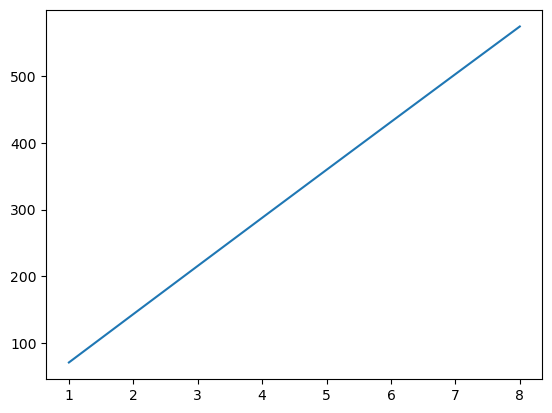

In [35]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

data = np.array([71.1,72.4,72.4,72.1,71.4,72.0,71.6])
n = len(data)
# 原始数据的级比检验
lmda = []
for i in range(1, n):
    lmda.append(data[i-1] / data[i])
    
left =  np.exp(-2 / (n+1))
right = np.exp(2/(n+2))
for i in range(len(lmda)):
    if lmda[i] <= left or lmda[i] >= right:
        print("第", i+1, "个lambda未通过级比检验")

# 获得有规律的新序列
newData = np.array([sum(data[: i]) for i in range(1,n + 1)])
# print(newData)

# 建立微分方程
def func(x,t,a,u):
    return -a*x+u;

# 获取修正变量z
z = np.array([-0.5*(newData[i] + newData[i+1]) for i in range(n-1)])
# print(z)
Y = data[1 : n].reshape(-1, 1)
B = np.column_stack((z, np.ones(6)))
# print(Y)
# print(B)

U = np.linalg.inv((B.T @ B)) @ B.T @ Y
# print(U)

# 解一阶线性方程
a, u = U[0], U[1]
args = (U[0], U[1])
t = np.arange(1, 9, 1)
y0 = [71.1]
y = odeint(func, y0, t, args=args)

plt.plot(t, y)
print("y:",y)
print("下一年的道路噪声平均声级数据为:", y[len(y)-1] - y[len(y)-2])

dataDeduce = []
for i in range(1, len(y)):
    dataDeduce.append(y[i][0] - y[i-1][0])
# print(xdeduce)
var = [abs(data[i]-dataDeduce[i]) / data[i] for i in range(len(data))]
rho = [1 - ((1-0.5*a) / (1+0.5*a)) * lmda[i] for i in range(len(lmda))]

print("对于数据var:")
for i in range(len(var)):
    if var[i] < 0.1:
        print("第",i+1,"个数据达到较高要求")
    elif var[i] < 0.2:
        print("第",i+1,"个数据达到一般要求")
    else:
        print("第",i+1,"个数据未达到要求")
    
print("对于数据rho:")        
for i in range(len(rho)):
    if rho[i] < 0.1:
        print("第",i+1,"个数据达到较高要求")
    elif rho[i] < 0.2:
        print("第",i+1,"个数据达到一般要求")
    else:
        print("第",i+1,"个数据未达到要求")
